In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Load Bitcoin price data from Yahoo Finance
btc = yf.download('BTC-USD', start='2014-01-01', end='2023-12-31')
btc = btc[['Close']]  # use only Close prices
btc.dropna(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Step 2: Create feature and label
btc['Prediction'] = btc['Close'].shift(-30)  # predict 30 days into the future

In [5]:
X = np.array(btc.drop(['Prediction'], axis=1))[:-30]
y = np.array(btc['Prediction'])[:-30]

In [7]:
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Step 5: Test the model
predictions = model.predict(X_test)

In [10]:
# Evaluation
print("R^2 Score:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

R^2 Score: 0.9283551235747118
MSE: 19040642.092723127


In [11]:
# Step 6: Forecast the next 30 days
forecast = model.predict(np.array(btc.drop(['Prediction'], axis=1))[-30:])

In [12]:
# Step 7: Plotting
forecast_dates = btc.index[-30:]

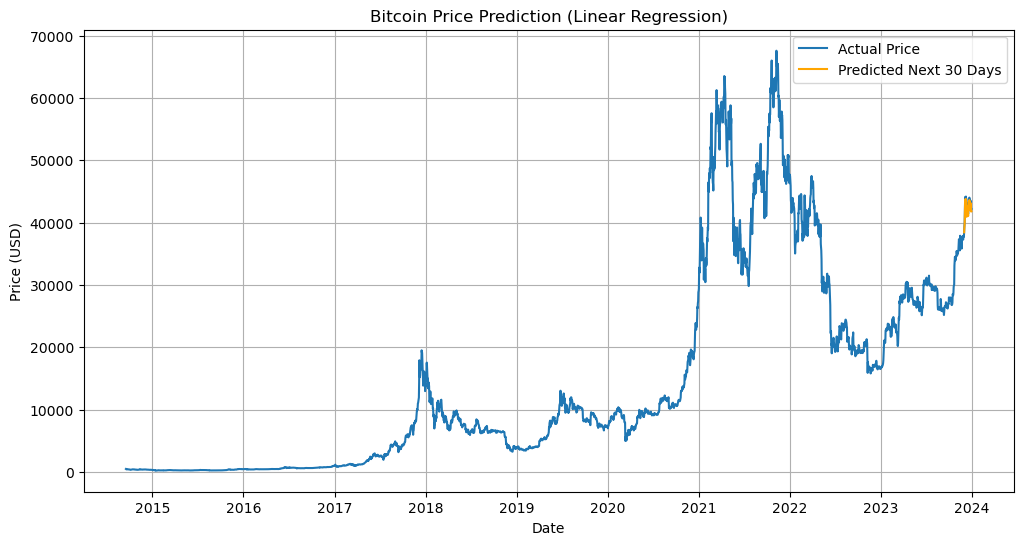

In [13]:
plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label='Actual Price')
plt.plot(forecast_dates, forecast, label='Predicted Next 30 Days', color='orange')
plt.title('Bitcoin Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()